In [2]:
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

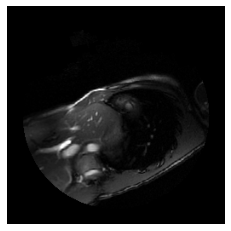

In [9]:
# Spatial transformation
dicomfile = ".\dicom-files\SCD2001_MR_201.dcm"
im = imageio.v2.imread(dicomfile)
print(im.shape)
plt.imshow(im,cmap='gray')
plt.axis("off")

(156.16522377879218, 110.48516361474019)


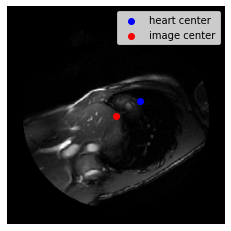

In [11]:
# Translation
com = ndi.center_of_mass(im)
print(com)

plt.imshow(im,cmap='gray')
plt.scatter(com[0],com[1],color='blue',label='heart center')
plt.scatter(128,128,color='red',label='image center')
plt.axis("off")
plt.legend()

(-0.5, 255.5, 255.5, -0.5)

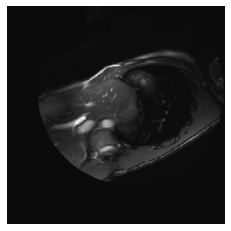

In [13]:
d0 = 128-com[0]
d1 = 128-com[1]
xfm = ndi.shift(im,shift=[d0,d1])

plt.imshow(xfm,cmap='gray')
plt.axis("off")

(-0.5, 339.5, 339.5, -0.5)

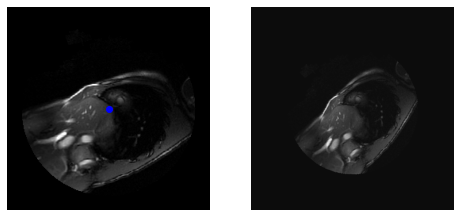

In [23]:
# Rotation
fg,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(im,cmap='gray')
ax[0].scatter(128,128,color='blue')
ax[0].axis("off")
ax[1].imshow(ndi.rotate(im,angle=25,axes=(0,1)),cmap='gray')
ax[1].axis("off")

(-0.5, 255.5, 255.5, -0.5)

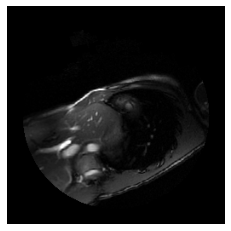

In [32]:
# Transformation matrix
# Identity matrix
mat = [
    [1,0,0],
    [0,1,0],
    [0,0,1]
]
xfm = ndi.affine_transform(im,mat)

plt.imshow(xfm,cmap='gray')
plt.axis("off")

(-0.5, 255.5, 255.5, -0.5)

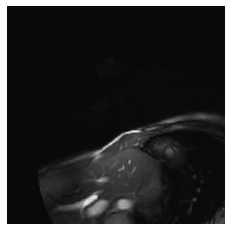

In [33]:
# Translate and rescale
mat = [
    [0.8, 0, -20],
    [0, 0.8, -10],
    [0, 0, 1]
]
xfm = ndi.affine_transform(im,mat)

plt.imshow(xfm,cmap='gray')
plt.axis("off")

image shape: (256, 256)
image shape after downsampling: (128, 128)


Text(0.5, 1.0, 'Downsampling')

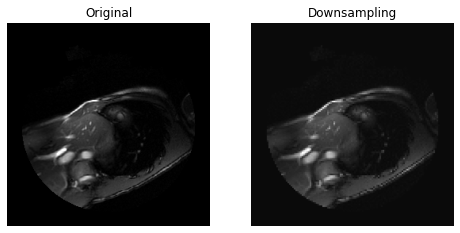

In [50]:
# Resampling and Interpolation

# Downsampling
im_dn = ndi.zoom(im,zoom=0.5)
print("image shape:",im.shape)
print("image shape after downsampling:",im_dn.shape)

fg,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(im,cmap='gray')
ax[0].axis("off")
ax[0].set_title("Original")

ax[1].imshow(im_dn,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Downsampling")

image shape: (256, 256)
image shape after upsampling: (2560, 2560)


Text(0.5, 1.0, 'Upsampling')

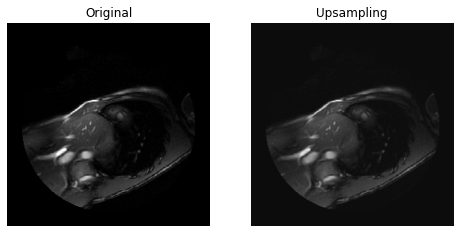

In [53]:
# Upsampling
im_up = ndi.zoom(im,zoom=10)
print("image shape:",im.shape)
print("image shape after upsampling:",im_up.shape)

fg,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(im,cmap='gray')
ax[0].axis("off")
ax[0].set_title("Original")

ax[1].imshow(im_up,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Upsampling")

#### -- The End --